<a href="https://colab.research.google.com/github/matcrg/MVP_Machine_Learning_PUC-Rio/blob/main/MVP_Machine_Learning_VFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning

##Definição do Problema:

**Qual é a descrição do problema?**

Criar e treinar um modelo de Machine Learning capaz de prever o preço médio de casas na Califórnia, a partir de um clássico conjunto de dados, o "california_housing".

**Que premissas ou hipóteses você tem sobre o problema?** O modelo deve ser treinado utilizando os métodos Linear Regression e Random Forest Regressor e avaliar o seu desempenho e selecionar o melhor método.

**Que restrições ou condições foram impostas para selecionar os dados?**
Este dataset possui um conjunto compreensível de variáveis e um tamanho otimizado para uma análise acadêmica. Os dados contem informações sobre casas de um determinado distrito da Califórnia e algumas informações resumidas baseadas no censo de 1990 da Califórnia.

**Defina cada um dos atributos do dataset.** Os dados para o projeto foram coletados em 10/12/2024 a partir de um dataset disponibilizado no website Kaggle pelo usuário "Cam Nugent".

Os dados foram obtidos por meio do endereço https://www.kaggle.com/datasets/camnugent/california-housing-prices e seu uso é permitido sob a licença CC0 1.0 Universal (CC0 1.0), conforme os  termos disponíveis no link a seguir: https://creativecommons.org/publicdomain/zero/1.0/.

O dataset utilizado para este projeto é um arquivo CSV que possui dez colunas:

*   **longitude**: uma medida de qual longe a oeste a casa está; quanto maior o valor, mais a oeste está.
*   **latitude**: uma medida de quão longe ao norte a casa está; quanto maior o valor, mais a norte está.
*   **housing_median_age**: mediana da idade das casas em anos dentro de um bloco de casas; quanto menor o número, mais nova é a casa.
*   **total_rooms**: o número total de quartos em um bloco de casas.
*   **total_bedrooms**: o número total de quartos de dormir em um bloco de casas.
*   **population**: o número total de pessoas residentes em um bloco de casas.
*   **households**: o número total de lares, em um bloco de casas.
*   **median_income**: a mediana da renda de lares em um bloco de casas (calculado em dez milhares de dólares).
*   **median_house_value**: a mediana do valor das casas em um bloco de casas (calculado em dólares).
*   **ocean_proximity**: a localização das casas em relação ao oceano/mar.

## Preparação de Dados

###Configurações iniciais

Utilizaremos o bloco de código abaixo para importar as bibliotecas e funções python que utilizaremos ao longo da análise:

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error, r2_score # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.ensemble import RandomForestRegressor # algoritmo Random Forest
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

### Carga do dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/matcrg/MVP_Machine_Learning_PUC-Rio/refs/heads/main/housing.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Exibindo as primeiras linhas
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Transformação de dados

#### Tratamento de missings
Analisando o dataset utilizando o código abaixo, podemos perceber que há 20.640 linhas no dataset, e 10 colunas, sendo 9 numéricas e 1 de texto. Além disso, é possível perceber que há 207 linhas onde há valores nulos na coluna "total_bedrooms".

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Como há muito poucos nulos no dataset, podemos removê-los sem causar um grande impacto no treinamento do modelo.

Também será preciso transformar ou eliminar os dados de texto para que o modelo de regressão funcione corretamente.

In [4]:
# Remover as linhas com valores nulos e salva as mudanças no dataset
dataset.dropna(inplace=True)

# Exibir as informações do dataset após exclusão dos nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Feito isso, o dataset agora possui 20.433 linhas com valores não-nulos.

In [5]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### One-Hot-Encoding
Em seguida, transformaremos a variável categórica "ocean_proximity" em numérica utilizando o método One-Hot-Encoding para criar novos atributos binários indicando o quão próximo ao oceano/mar a residência está.

In [6]:
dataset.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [7]:
# Aplica o One-Hot-Encoding para a variável "ocean_proximity", criando 5 novas variáveis binárias, exclui a variável categórica e salva o dataset
dataset = dataset.join(pd.get_dummies(dataset.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

In [8]:
# Exibe o dataset com as modificações realizadas
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


### Análise de dados

O mapa de calor a seguir evidencia a correlação entre a proximidade com o oceano e o valor médio das casas. Casas localizada a menos de 1 hora do oceano ("<1H OCEAN") tem um valor médio maior, principalmente comparadas às localizadas no interior ("INLAND"), onde a correlação é negativa.

<Axes: >

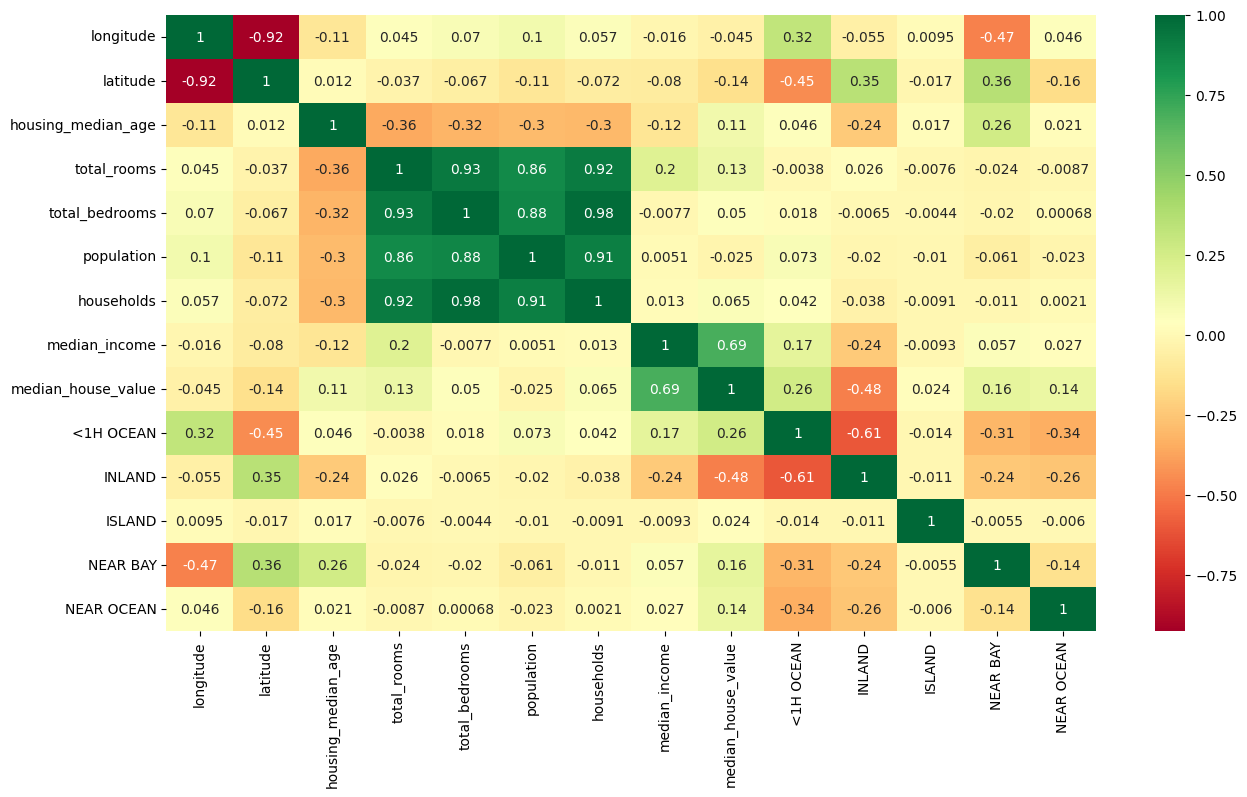

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')

O gráfico de dispersão a seguir ilustra o valor médio das casas de acordo com a sua localização. O formato do gráfico se assemelha ao contorno da costa do estado da Califórnia e é possível perceber como as casas com maior valor médio estão localizadas mais próximas ao oceano.

<Axes: xlabel='latitude', ylabel='longitude'>

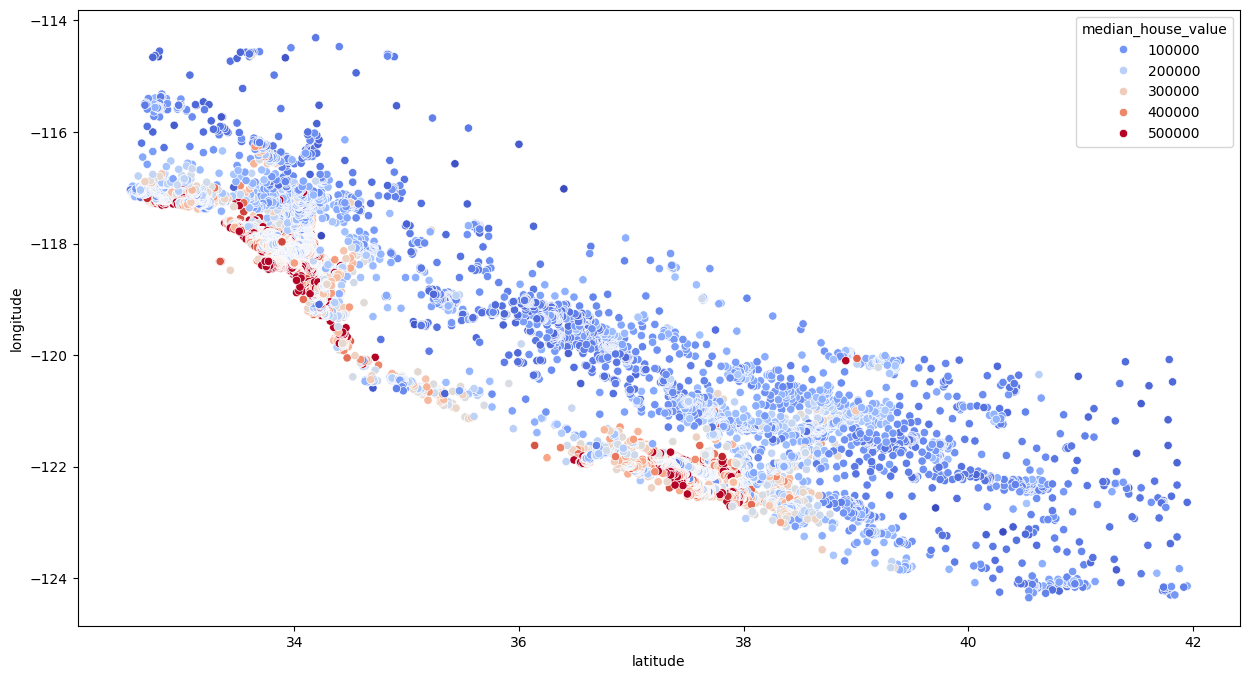

In [10]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=dataset, hue="median_house_value", palette="coolwarm")

### Feature Engeenering
Analisando o mapa de calor gerado anteriormente, é possível perceber que os atributos "population", "total_bedrooms", "total_rooms" e "households" não são tão relevantes para analisar o valor médio das casas pois, no caso deste dataset, estes valores são contabilizados por blocos de casas.

No entanto, combinar alguns desses atributos pode gerar insights mais valiosos, como por exemplo:

*   bedroom_ratio (calcular a relação entre o total de quartos de um bloco de casas e o total de quartos de dormir);
*   household_rooms (calcular a média de quartos por lar)
*   population_households (calcular a média de quartos por lar)
*   NEAR_BAY_OCEAN (indica se a casa está localizada próximo ao oceano)

In [11]:
# Cria quatro novas features
dataset['bedroom_ratio'] = dataset['total_bedrooms'] / dataset['total_rooms']
dataset['household_rooms'] = dataset['total_rooms'] / dataset['households']
dataset['population_households'] = dataset['population'] / dataset['households']
dataset['NEAR_BAY_OCEAN'] = dataset['<1H OCEAN'] | dataset['NEAR BAY'] | dataset['NEAR OCEAN']

<Axes: >

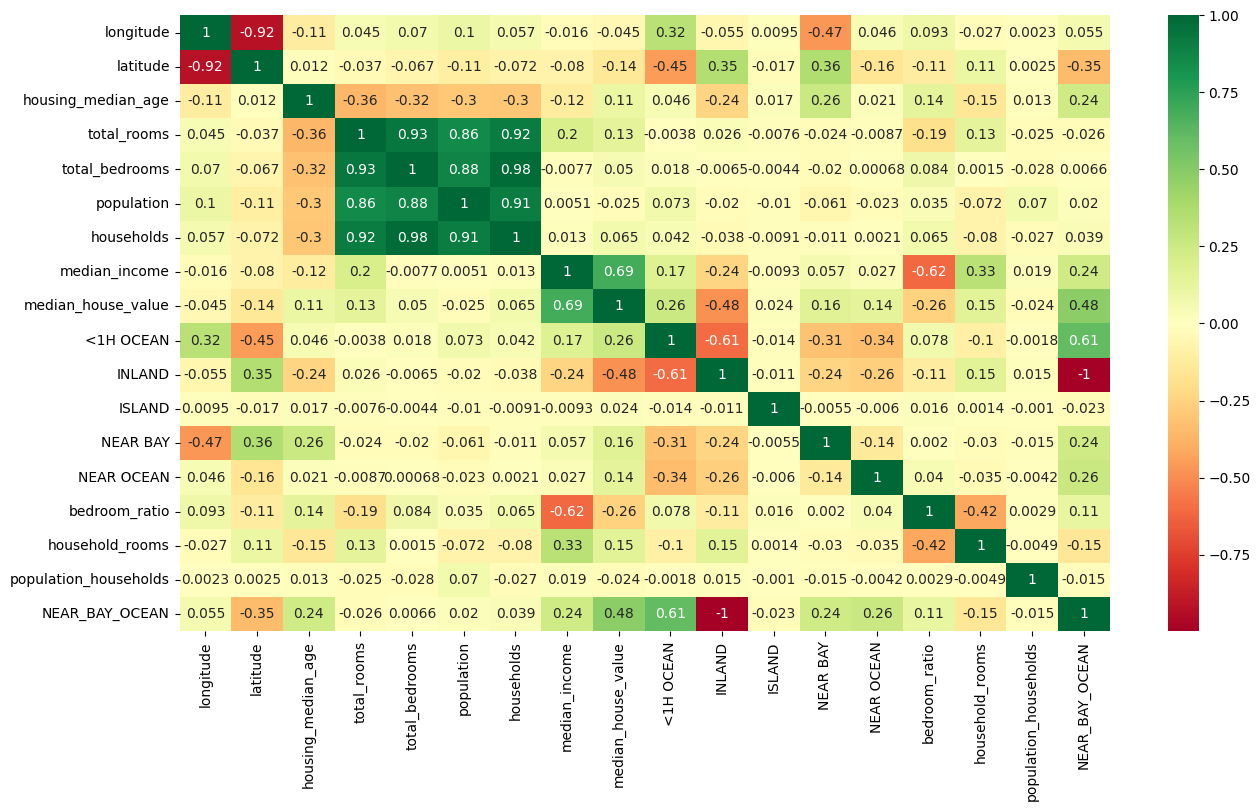

In [12]:
# Exibe o mapa de calor após a adição das novas features
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')

Como a nova feature "NEAR_BAY_OCEAN" passou a agregar os valores das features "<1H OCEAN", "NEAR_BAY" e "NEAR_OCEAN", podemos excluir essas colunas do dataset, junto com feature "INLAND", pois ela é redundante, e a feature "ISLAND" que é irrelevante para a correlação com a variável target pois possui muitos poucos registros.

In [13]:
# Remover os atributos descendentes de ocean_proximity
dataset = dataset.drop(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], axis = 1)

In [14]:
# Exibir os atributos após a eliminação dos atributos
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,population_households,NEAR_BAY_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,6.984127,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,6.238137,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.224625,5.045455,2.560606,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.215208,6.114035,3.122807,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.215173,5.205543,2.325635,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.219892,5.329513,2.123209,0


### Separação do dataset em atributos e target

O atributo alvo, ou "target", será o **median_house_value** e os demais atributos serão utilizados para prever este valor.

In [15]:
# Separação entre atributos e target
X = dataset.drop(['median_house_value'], axis=1) # atributos
y = dataset['median_house_value'] # classe (target)

### Feature Selection
Aplicaremos métodos de feature selection antes de dividir os dados em bases de treino e teste para escolher os atributos mais relevantes para o modelo visando melhorar o desempenho e reduzir a complexidade do modelo, evitando overfitting.

#### Método de Seleção Univariada (SelectKBest):
Utilizando o método SelectKBest, calcularemos o score de cada atributo numérico em relação à variável target "median_house_value" usando a função f_regression e selecionaremos os 5 melhores atributos.

In [16]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k=5)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", X.columns[0:12])

# Exibe as pontuações de cada atributos e os 5 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=X.columns[0:12]))


Número original de atributos: 12

Número reduzido de atributos: 5

Atributos Originais: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'bedroom_ratio', 'household_rooms', 'population_households',
       'NEAR_BAY_OCEAN'],
      dtype='object')

Scores dos Atributos Originais: [4.220e+01 4.366e+02 2.341e+02 3.696e+02 5.056e+01 1.309e+01 8.640e+01
 1.840e+04 1.431e+03 4.789e+02 1.142e+01 6.247e+03]

Atributos Selecionados: ['latitude' 'median_income' 'bedroom_ratio' 'household_rooms'
 'NEAR_BAY_OCEAN']


#### Método de Eliminação Recursiva de Atributos
Agora, utlizaremos o método RFE (Eliminação Recursiva de Atributos) para ranquear os atributos com base em sua importância para o modelo, removendo o atributo menos importante até sobrar apenas 5 atributos.

In [17]:
# Create the RFE object and rank each pixel
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1) # Selecionar top 5 features
selector = selector.fit(X, y)

# Print das features selecionadas
selected_features = X.columns[selector.support_]
print("Selected Features using RFE:", selected_features)

# Rankear os atributos selecionados
feature_ranking = selector.ranking_
print("\nFeature Ranking:", feature_ranking)

Selected Features using RFE: Index(['longitude', 'latitude', 'median_income', 'bedroom_ratio',
       'NEAR_BAY_OCEAN'],
      dtype='object')

Feature Ranking: [1 1 3 8 7 6 5 1 1 2 4 1]


#### Refinamento da quantidade de atributos
Considerando as análises realizadas com os métodos SelectKBest, RFE e as análises de correlação de features feitas anteriormente, podemos remover do conjunto de atributos, as seguintes features, uma vez que esses atributos, por si só, não se correlacionam de forma relevante com a variável target:
*   longitude
*   latitude
*   housing_median_age




In [18]:
# Remover os atributos disponsáveis
X = X.drop(['longitude', 'latitude', 'housing_median_age'], axis=1)

In [19]:
# Visualizar o conjunto de atributos após o tratamento de dados
X

,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,household_rooms,population_households,NEAR_BAY_OCEAN
0,880.0,129.0,322.0,126.0,8.3252,0.146591,6.984127,2.555556,1
1,7099.0,1106.0,2401.0,1138.0,8.3014,0.155797,6.238137,2.109842,1
2,1467.0,190.0,496.0,177.0,7.2574,0.129516,8.288136,2.802260,1
3,1274.0,235.0,558.0,219.0,5.6431,0.184458,5.817352,2.547945,1
4,1627.0,280.0,565.0,259.0,3.8462,0.172096,6.281853,2.181467,1
...,...,...,...,...,...,...,...,...,...
20635,1665.0,374.0,845.0,330.0,1.5603,0.224625,5.045455,2.560606,0
20636,697.0,150.0,356.0,114.0,2.5568,0.215208,6.114035,3.122807,0
20637,2254.0,485.0,1007.0,433.0,1.7000,0.215173,5.205543,2.325635,0
20638,1860.0,409.0,741.0,349.0,1.8672,0.219892,5.329513,2.123209,0


Portanto, o conjunto de atributos para criação e avaliação do modelo está finalizado. Seguimos para a etapa de separação em bases de treino e teste.

### Separação dos atributos em base de treino e teste (holdout)

A seguir, separamos os dados entre a base de treino e teste, separando 20% dos dados para teste.

In [20]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Preparando os folds para a Validação Cruzada

In [21]:
# Parâmetros e partições da validação cruzada
scoring = 'neg_mean_squared_error' # métrica de avaliação
num_particoes = 10 # número de folds da validação cruzada

kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # faz o particionamento em 10 folds

## Modelagem e treinamento
Utilizaremos os algoritmos LinearRegression e RandomForestRegressor.

O LinearRegression é um algoritmo simples e indicado para problemas de regressão quando há uma relação linear entre os atributos e a variável target.

O RandomForestRegressor é um algoritmo versátil capaz de lidar com relações não lineares e interações complexas entre as variáveis.

Ambos são boas opções iniciais para problemas de regressão.

### Criação e avaliação de modelos: linha base
Obs: o tempo de execução do bloco de código a seguir é de aproximadamente 3 minutos

LinearRegression: MSE 5039503332.92 (436063913.05) - RMSE 70989.46
RandomForestRegressor: MSE 4232434657.66 (259496386.94) - RMSE 65057.16


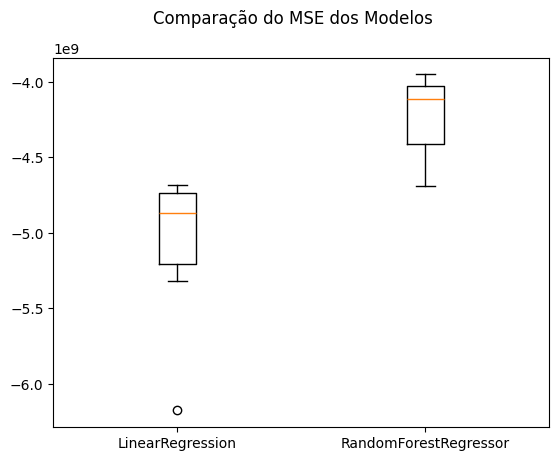

In [22]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LinearRegression', LinearRegression()))
models.append(('RandomForestRegressor', RandomForestRegressor()))

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
    msg = "%s: MSE %0.2f (%0.2F) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados
Obs: o tempo de execução do bloco de código a seguir é de aproximadamente 9 minutos

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
LinearRegression = ('LinearRegression', LinearRegression())
RandomForestRegressor = ('RandomForestRegressor', RandomForestRegressor())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([LinearRegression])))
pipelines.append(('RFR-orig', Pipeline([RandomForestRegressor])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, LinearRegression])))
pipelines.append(('RFR-padr', Pipeline([standard_scaler, RandomForestRegressor])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, LinearRegression])))
pipelines.append(('RFR-norm', Pipeline([min_max_scaler, RandomForestRegressor])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
    msg = "%s: MSE %0.3f (%0.3f) - RMSE %0.3f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

LR-orig: MSE 5039503332.917 (436063913.052) - RMSE 70989.459


O modelo foi treinando utilizando os algoritmos Linear Regression e Random Forest Regressor.

Não há um ajuste inicial dos hiperparâmetros para os modelos Linear Regression e Random Forest Regressor. Foram utilizados os valores padrão da biblioteca scikit-learn para compor a "linha base" para a avaliação inicial.





### Resultados do Treinamento

O modelo foi treinado e avaliado usando validação cruzada com 10 folds. Os resultados foram apresentados em termos de MSE (Erro Quadrático Médio) e RMSE (Raiz Quadrada do Erro Quadrático Médio). Os valores de MSE e RMSE apresentados indicam de que o modelo pode estar sofrendo de underfitting.

### Otimização de hiperparâmetros para o RandomForestRegressor

Devido ao atual alto custo operacional para execução do código na plataforma Colab, não faremos otimização de hiperparâmetros neste momento, mas recomenda-se, futuramente, otimizar os hiperparâmetros do RandomForestRegressor, importando a classe GridSearchCV e definindo um dicionário com os hiperparâmetros a serem testados e seus valores.

Os hiperparâmetros para ajuste sugeridos são:

*   n_estimators
*   max_depth
*   min_samples_split
*   min_samples_split

**Justificativas:**

**n_estimators:** Aumentar o número de árvores pode melhorar o desempenho, mas também aumenta o tempo de treinamento, que já está bem longo.

**max_depth:** Limitar a profundidade pode ajudar a evitar overfitting.

**min_samples_split:** Indicar o número mínimo de amostras necessárias para dividir um nó interno.

**min_samples_leaf:** Indicar o número mínimo de amostras necessárias para ser uma folha.

## Avaliação de Resultados

In [ ]:
# Avaliação do modelo com o conjunto de testes

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = RandomForestRegressor()
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
y_pred = model.predict(rescaledTestX)

# Cálculo das métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # Raiz quadrada do MSE
r2 = r2_score(y_test, y_pred)

# Resultados das métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

### **Resumo dos Principais Achados**
O objetivo do projeto foi criar um modelo de Machine Learning para prever o preço médio de casas na Califórnia usando o dataset "california_housing".

Os algoritmos Linear Regression e Random Forest Regressor foram utilizados para construir os modelos.

A análise exploratória dos dados revelou insights importantes, como a correlação entre a proximidade do oceano e o valor das casas.

Técnicas de Feature Engineering foram aplicadas para criar novas features e melhorar a performance dos modelos.
Feature Selection foi utilizada para selecionar os atributos mais relevantes para o modelo.

O modelo RandomForestRegressor, com os dados padronizados, apresentou o melhor desempenho, com um RMSE de aproximadamente 49.000 dólares.

O modelo final obteve um R² de 0.7038, indicando um bom ajuste aos dados, mas com margem para melhorias.

### **Análise dos Resultados e Pontos de Atenção**

O modelo RandomForestRegressor, com dados padronizados, apresentou o menor erro, sugerindo ser a melhor escolha para este problema.

Apesar do bom desempenho, o modelo pode estar sofrendo de underfitting, o que significa que ele não está capturando toda a complexidade dos dados.

A otimização de hiperparâmetros do RandomForestRegressor pode melhorar o desempenho do modelo, mas não foi realizada neste MVP devido a restrições de tempo e recursos computacionais.

A inclusão de outras variáveis relevantes pode aprimorar o modelo.

É importante realizar uma análise mais aprofundada dos erros do modelo para entender suas causas e direcionar as próximas etapas do projeto.

É recomendado realizar testes com outros algoritmos de Machine Learning para encontrar o que apresenta o melhor desempenho para o problema em questão.

### **Conclusão**

Este projeto demonstrou a viabilidade da aplicação de Machine Learning para prever o preço médio de casas na Califórnia.

O modelo RandomForestRegressor, com os dados padronizados, apresentou o melhor desempenho, com um R² de 0.7038.

Apesar dos resultados promissores, há espaço para melhorias, como a otimização de hiperparâmetros, a inclusão de novas variáveis e a utilização de outros algoritmos.

Este MVP serviu como uma base de estudos para levar a um modelo ainda mais preciso e robusto para prever o valor das casas.